[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
font_family

'Malgun Gothic'

In [6]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
# 그래프 스타일 설정
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용


<AxesSubplot:title={'center':'한글'}>

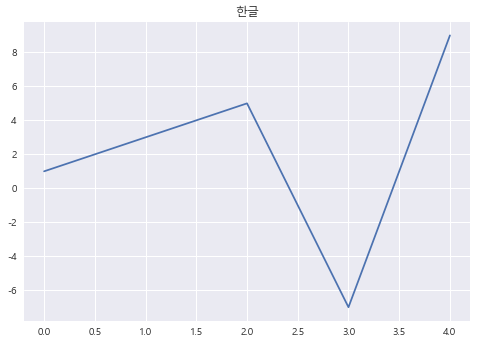

In [15]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [25]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

In [36]:
# read_html을 통해 해당 업종/테마를 수집합니다.
# table
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [39]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
raw = raw.dropna(how="all").dropna(axis=1, how="all")
print(raw.shape)
# raw
# 3개의 row, 3개의 column이 제거되었습니다.

(100, 12)
(97, 10)


In [40]:
raw

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0
2,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0
3,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0
4,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0
5,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0
...,...,...,...,...,...,...,...,...,...,...
93,엔켐 *,테마 편입 사유,102300.0,8400.0,-7.59%,102300.0,102900.0,271870.0,28388.0,380586.0
94,엠플러스 *,테마 편입 사유,23150.0,2300.0,-9.04%,23100.0,23150.0,586707.0,13714.0,575122.0
95,에코프로비엠 *,테마 편입 사유,393700.0,40100.0,-9.24%,394100.0,394300.0,531622.0,216016.0,287613.0
96,디이엔티 *,테마 편입 사유,5700.0,680.0,-10.66%,5680.0,5700.0,208647.0,1235.0,121347.0


## 파생변수 만들기

In [45]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-01-24'

In [49]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today
raw["조회일자"]

1     2022-01-24
2     2022-01-24
3     2022-01-24
4     2022-01-24
5     2022-01-24
         ...    
93    2022-01-24
94    2022-01-24
95    2022-01-24
96    2022-01-24
97    2022-01-24
Name: 조회일자, Length: 97, dtype: object

In [51]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0,2022-01-24
2,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0,2022-01-24
3,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0,2022-01-24
4,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0,2022-01-24
5,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0,2022-01-24


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

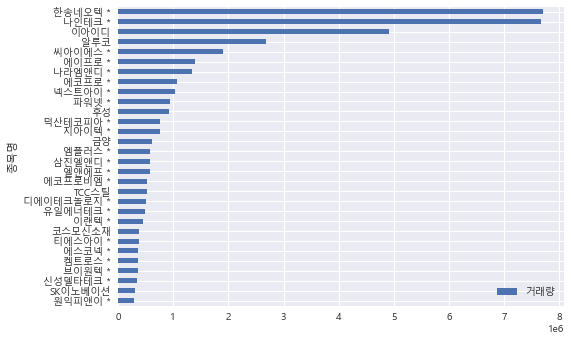

In [62]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
# temp
temp = raw[["종목명","거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

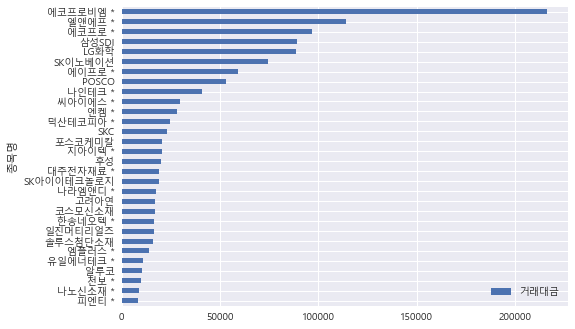

In [71]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [76]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

C:\Users\wkdwoo\AppData\Local\Temp/ipykernel_29516/1266605686.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")


In [78]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,덕산테코피아 *,덕산테코피아
2,신성델타테크 *,신성델타테크
3,유일에너테크 *,유일에너테크
4,나인테크 *,나인테크
5,브이원텍 *,브이원텍


In [80]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [83]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Symbol", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [85]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(97, 12)

In [89]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
df = raw.merge(df_item_code_name, on="종목명_전처리")
df.shape

(97, 13)

In [90]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0,2022-01-24,덕산테코피아,317330
1,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0,2022-01-24,신성델타테크,065350
2,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0,2022-01-24,유일에너테크,340930
3,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0,2022-01-24,나인테크,267320
4,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0,2022-01-24,브이원텍,251630


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [91]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [94]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [98]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="CP949")
len(tables)

13

In [113]:
# 제대로 수집이 되었는지 확인합니다.
tables[3].iloc[:, [0,-1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2021.12(E)
,주요재무정보,IFRS연결
0,매출액,5876.00
1,영업이익,2237.00
2,당기순이익,1695.00
3,영업이익률,38.08
4,순이익률,28.85
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [118]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([finance_info, tables[6],tables[7],tables[8],tables[9]]).set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5876.0,2237.0,1695.0,38.08,28.85,NaN,NaN,NaN,NaN,1362.0,...,28186684,20.43%,"4.00매수 l 287,280","375,906 l 155,500","42.11배 l 3,930원","38.00배 l 4,380원","6.05배 l 27,367원",0.44%,75.36배,-1.29%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [122]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [123]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0,-1]]
finance_info.columns = [0,1]
item_info.append(finance_info)

In [124]:
item_info

[            0         1
 0         매출액   5876.00
 1        영업이익   2237.00
 2       당기순이익   1695.00
 3       영업이익률     38.08
 4        순이익률     28.85
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)   1362.00
 10     PER(배)    120.08
 11     BPS(원)  28372.00
 12     PBR(배)      5.76
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN]

In [126]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [127]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0         1
 0         매출액   5876.00
 1        영업이익   2237.00
 2       당기순이익   1695.00
 3       영업이익률     38.08
 4        순이익률     28.85
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)   1362.00
 10     PER(배)    120.08
 11     BPS(원)  28372.00
 12     PBR(배)      5.76
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN,
           0               1
 0      시가총액  22조  8,302  억원
 1    시가총액순위         코스피 13위
 2     상장주식수       137947128
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  137947128
 1  외국인보유주식수(B)   28186684
 2  외국인소진율(B/A)     20.43%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  287,280
 1   52주최고l최저  375,906  l  155,500,
                    0                  1
 0   PERlEPS(2021.09)  42.11배  l  3,930원
 1          추정PERlEPS  38.00배  l  4,380원
 2  PBRlBPS (2021.09)  6.05배  l  27,367원
 3      배당수익률l2021.12              0.44%,
       

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [131]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[0]

,0,1
0,매출액,5876.00
1,영업이익,2237.00
2,당기순이익,1695.00
3,영업이익률,38.08
4,순이익률,28.85
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1362.00


In [134]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5876.0
1,영업이익,2237.0
2,당기순이익,1695.0
3,영업이익률,38.08
4,순이익률,28.85
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1362.0


## transpose를 통해 행과 열의 위치를 변경

In [137]:
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5876.0,2237.0,1695.0,38.08,28.85,NaN,NaN,NaN,NaN,1362.0,...,28186684,20.43%,"4.00매수 l 287,280","375,906 l 155,500","42.11배 l 3,930원","38.00배 l 4,380원","6.05배 l 27,367원",0.44%,75.36배,-1.29%


In [142]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5876.0,2237.0,1695.0,38.08,28.85,NaN,NaN,NaN,NaN,1362.0,...,28186684,20.43%,"4.00매수 l 287,280","375,906 l 155,500","42.11배 l 3,930원","38.00배 l 4,380원","6.05배 l 27,367원",0.44%,75.36배,-1.29%


## 개별 주가 정보를 수집하는 함수를 생성

In [145]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="CP949")
    item_info = []
    finance_info = tables[3].iloc[:, [0,-1]]
    finance_info.columns = [0,1]
    item_info.append(finance_info)
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [146]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5304.0,749.0,721.0,14.12,13.59,NaN,NaN,NaN,NaN,366.0,...,25905181,16.71%,"4.00매수 l 104,653","157,416 l 62,700","63.68배 l 1,060원","56.00배 l 1,198원","5.21배 l 12,960원",0.38%,75.36배,-0.96%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [147]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [150]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/97 [00:00<?, ?it/s]

In [157]:
result.loc[1]

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률,동일업종 PER,동일업종 등락률
1,1702.0,68.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,189.0,...,2914054,10.60%,"4.00매수 l 22,000","22,600 l 7,860",19.40배 l 817원,N/A l N/A,"2.59배 l 6,118원",NaN,10.56배,-1.94%


## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [170]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [172]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2020.12),PBRlBPS (2020.12),종목코드
0,297.0,54.0,NaN,18.1,NaN,NaN,NaN,NaN,NaN,230.0,...,"29.22배 l 1,109원","28.00배 l 1,162원","3.43배 l 9,449원",NaN,39.47배,-1.49%,NaN,NaN,NaN,317330
1,1702.0,68.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,189.0,...,19.40배 l 817원,N/A l N/A,"2.59배 l 6,118원",NaN,10.56배,-1.94%,NaN,NaN,NaN,065350
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N/A l -247원,N/A l N/A,"4.99배 l 4,319원",NaN,24.42배,-0.57%,NaN,NaN,NaN,340930
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N/A l -128원,N/A l N/A,8.87배 l 617원,NaN,12.94배,-0.76%,NaN,NaN,NaN,267320
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.93배 l 482원,N/A l N/A,"1.70배 l 6,505원",NaN,24.42배,-0.57%,0.90%,NaN,NaN,251630


In [174]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0,2022-01-24,덕산테코피아,317330
1,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0,2022-01-24,신성델타테크,065350
2,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0,2022-01-24,유일에너테크,340930
3,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0,2022-01-24,나인테크,267320
4,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0,2022-01-24,브이원텍,251630


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [179]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [180]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((97, 13), (97, 35), (97, 47))

In [181]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2020.12),PBRlBPS (2020.12)
0,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0,...,"39,600 l 16,650","29.22배 l 1,109원","28.00배 l 1,162원","3.43배 l 9,449원",NaN,39.47배,-1.49%,NaN,NaN,NaN
1,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0,...,"22,600 l 7,860",19.40배 l 817원,N/A l N/A,"2.59배 l 6,118원",NaN,10.56배,-1.94%,NaN,NaN,NaN
2,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0,...,"41,000 l 16,450",N/A l -247원,N/A l N/A,"4.99배 l 4,319원",NaN,24.42배,-0.57%,NaN,NaN,NaN
3,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0,...,"6,530 l 2,580",N/A l -128원,N/A l N/A,8.87배 l 617원,NaN,12.94배,-0.76%,NaN,NaN,NaN
4,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0,...,"14,000 l 7,450",22.93배 l 482원,N/A l N/A,"1.70배 l 6,505원",NaN,24.42배,-0.57%,0.90%,NaN,NaN


## 파일명 만들기

In [186]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name
file_name_1 = url.split("=")[1].replace("&", "_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'theme_no_64_2022-01-24.csv'

In [189]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [190]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,52주최고l최저,PERlEPS(2021.09),추정PERlEPS,PBRlBPS (2021.09),배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2020.12),PBRlBPS (2020.12)
0,덕산테코피아 *,테마 편입 사유,32700.0,1600.0,+5.14%,32250.0,32300.0,768832.0,24429.0,1018494.0,...,"39,600 l 16,650","29.22배 l 1,109원","28.00배 l 1,162원","3.43배 l 9,449원",NaN,39.47배,-1.49%,NaN,NaN,NaN
1,신성델타테크 *,테마 편입 사유,15750.0,150.0,+0.96%,15600.0,15700.0,352753.0,5525.0,1675407.0,...,"22,600 l 7,860",19.40배 l 817원,N/A l N/A,"2.59배 l 6,118원",NaN,10.56배,-1.94%,NaN,NaN,NaN
2,유일에너테크 *,테마 편입 사유,21250.0,200.0,+0.95%,21450.0,21500.0,490279.0,10694.0,192361.0,...,"41,000 l 16,450",N/A l -247원,N/A l N/A,"4.99배 l 4,319원",NaN,24.42배,-0.57%,NaN,NaN,NaN
3,나인테크 *,테마 편입 사유,5370.0,50.0,+0.94%,5350.0,5360.0,7667628.0,41021.0,7211693.0,...,"6,530 l 2,580",N/A l -128원,N/A l N/A,8.87배 l 617원,NaN,12.94배,-0.76%,NaN,NaN,NaN
4,브이원텍 *,테마 편입 사유,11000.0,100.0,+0.92%,10850.0,10900.0,355351.0,3902.0,698667.0,...,"14,000 l 7,450",22.93배 l 482원,N/A l N/A,"1.70배 l 6,505원",NaN,24.42배,-0.57%,0.90%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,엔켐 *,테마 편입 사유,102300.0,8400.0,-7.59%,102300.0,102900.0,271870.0,28388.0,380586.0,...,"136,000 l 77,000",NaN,N/A l N/A,NaN,NaN,55.14배,-2.10%,NaN,"1,984.62배 l 52원","9.58배 l 10,772원"
93,엠플러스 *,테마 편입 사유,23150.0,2300.0,-9.04%,23100.0,23150.0,586707.0,13714.0,575122.0,...,"29,300 l 11,850",N/A l -153원,N/A l N/A,"4.86배 l 4,804원",NaN,55.14배,-2.18%,NaN,NaN,NaN
94,에코프로비엠 *,테마 편입 사유,393700.0,40100.0,-9.24%,394100.0,394300.0,531622.0,216016.0,287613.0,...,"575,100 l 145,200","107.67배 l 3,718원","88.00배 l 4,566원","17.04배 l 23,486원",NaN,55.14배,-2.10%,0.23%,NaN,NaN
95,디이엔티 *,테마 편입 사유,5700.0,680.0,-10.66%,5680.0,5700.0,208647.0,1235.0,121347.0,...,"12,100 l 2,850",N/A l -366원,N/A l N/A,"3.63배 l 1,607원",NaN,39.47배,-1.54%,NaN,NaN,NaN
